In [ ]:
pip install vaderSentiment

In [ ]:
import csv
import requests

# API key for New York Times
api_key = "JwmbAISGUUKEcDO545gv84IMdEo4z1Qu"

# Function to fetch articles from the New York Times API
def fetch_articles(api_key, query, begin_date, end_date, page=0):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    params = {
        "api-key": api_key,
        "q": query,
        "begin_date": begin_date,
        "end_date": end_date,
        "page": page
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code)
        return None

# Query parameters
query_keywords = ["house prices", "mortgage rates", "real estate market", "housing affordabity"]
begin_date = "2014-04-17"  # Ten years ago
end_date = "2024-04-17"

# Fetch articles
articles = fetch_articles(api_key, query_keywords, begin_date, end_date)

if articles:
    # Open a CSV file to write the data
    with open("real_estate_articles.csv", "w", newline="", encoding="utf-8") as csvfile:
        fieldnames = ["Headline", "Snippet"]
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        # Write header
        writer.writeheader()

        # Iterate through each article and write to CSV
        for article in articles["response"]["docs"]:
            headline = article["headline"]["main"]
            snippet = article["snippet"]

            # Write data to CSV
            writer.writerow({"Headline": headline, "Snippet": snippet})
    print("Data exported to real_estate_articles.csv")
else:
    print("No articles found.")


Data exported to real_estate_articles.csv


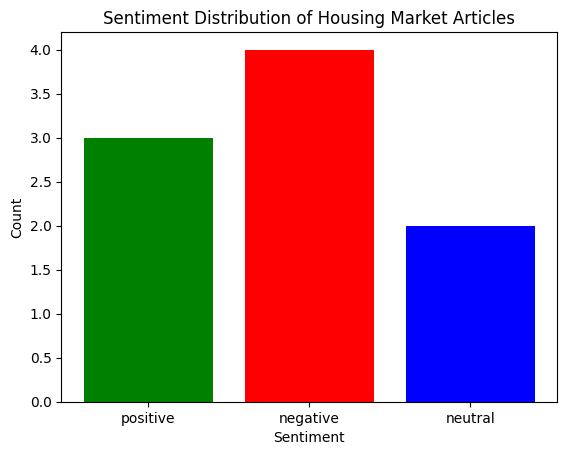

In [ ]:
import pandas as pd
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Function to fetch articles from the New York Times API
def fetch_articles(api_key, query, begin_date, end_date, page=0):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    params = {
        "api-key": api_key,
        "q": query,
        "begin_date": begin_date,
        "end_date": end_date,
        "page": page
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code)
        return None

# Function to perform sentiment analysis using Vader
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Read the CSV file containing articles
try:
    df = pd.read_csv('real_estate_articles.csv')
except FileNotFoundError:
    print("Error: CSV file not found.")
    exit(1)

# Initialize sentiment counts
sentiments = {"positive": 0, "negative": 0, "neutral": 0}

# Iterate through articles, perform sentiment analysis, and accumulate counts
for snippet in df['Snippet']:
    # Check for missing values
    if pd.isnull(snippet):
        continue

    # Sentiment analysis
    sentiment = analyze_sentiment(snippet)

    # Classify sentiment and accumulate counts
    if sentiment["compound"] > 0.05:
        sentiments["positive"] += 1
    elif sentiment["compound"] < -0.05:
        sentiments["negative"] += 1
    else:
        sentiments["neutral"] += 1

# Plotting sentiment distribution as a bar chart
labels = sentiments.keys()
counts = sentiments.values()
plt.bar(labels, counts, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Housing Market Articles')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# Read the CSV file containing articles
try:
    df = pd.read_csv('real_estate_articles.csv')
except FileNotFoundError:
    print("Error: CSV file not found.")
    exit(1)

# Get the number of articles
num_articles = len(df)
print("Number of articles included:", num_articles)


Number of articles included: 10


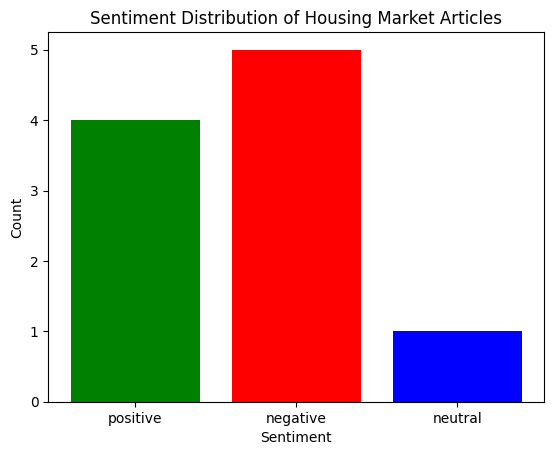

In [ ]:
import csv
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Function to fetch articles from the New York Times API
def fetch_articles(api_key, query, begin_date, end_date, page=0):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    params = {
        "api-key": api_key,
        "q": query,
        "begin_date": begin_date,
        "end_date": end_date,
        "page": page
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code)
        return None

# Function to perform sentiment analysis using Vader
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Query parameters
query_keywords = ["house prices", "mortgage rates", "real estate market"]
begin_date = "2014-04-17"  # Ten years ago
end_date = "2024-04-17"

# Fetch articles
articles = fetch_articles(api_key, query_keywords, begin_date, end_date)

if articles:
    # Initialize sentiment counts
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    # Iterate through articles, perform sentiment analysis, and accumulate counts
    for article in articles["response"]["docs"]:
        snippet = article["snippet"]

        # Sentiment analysis
        sentiment = analyze_sentiment(snippet)

        # Classify sentiment and accumulate counts
        if sentiment["compound"] > 0.05:
            sentiments["positive"] += 1
        elif sentiment["compound"] < -0.05:
            sentiments["negative"] += 1
        else:
            sentiments["neutral"] += 1

    # Plotting sentiment distribution as a bar chart
    labels = sentiments.keys()
    counts = sentiments.values()
    plt.bar(labels, counts, color=['green', 'red', 'blue'])
    plt.title('Sentiment Distribution of Housing Market Articles')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
else:
    print("No articles found.")


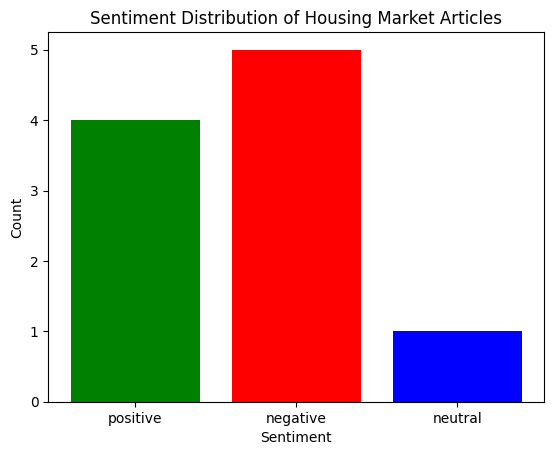

Headline: How to Navigate the Coronavirus Real Estate Market
Published Date: 2020-07-31T10:00:11+0000
Snippet: Suburbs and fashionable exurbs are hot, but don’t forget that home prices have fallen before, a Nobel laureate warns.
-------------------------------------
Headline: Rising Mortgage Rates Add to the Challenge of Buying a House
Published Date: 2022-02-18T14:00:10+0000
Snippet: The average rate on a 30-year, fixed-rate mortgage is now the highest since May 2019. And home prices are expected to rise, though probably more slowly.
-------------------------------------
Headline: The Housing Market Needs More Than Low Mortgage Rates
Published Date: 2019-10-31T09:00:26+0000
Snippet: Low rates don’t help much if you can’t get a loan or can’t afford a home.
-------------------------------------
Headline: China Tries to Ease Drop in Real Estate Prices
Published Date: 2014-05-19T11:53:47+0000
Snippet: Government economists expect property restrictions to remain in place in major cities, b

In [ ]:
import csv
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# API key for New York Times
api_key = "JwmbAISGUUKEcDO545gv84IMdEo4z1Qu"

# Function to fetch articles from the New York Times API
def fetch_articles(api_key, query, begin_date, end_date, page=0):
    url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"
    params = {
        "api-key": api_key,
        "q": query,
        "begin_date": begin_date,
        "end_date": end_date,
        "page": page
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print("Error:", response.status_code)
        return None

# Function to perform sentiment analysis using Vader
def analyze_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = analyzer.polarity_scores(text)
    return sentiment

# Query parameters
query_keywords = ["house prices", "mortgage rates", "real estate market"]
begin_date = "2014-04-17"  # Ten years ago
end_date = "2024-04-17"

# Fetch articles
articles = fetch_articles(api_key, query_keywords, begin_date, end_date)

if articles:
    # Initialize sentiment counts
    sentiments = {"positive": 0, "negative": 0, "neutral": 0}

    # Initialize lists to store article information
    headlines = []
    snippets = []
    pub_dates = []

    # Iterate through articles, perform sentiment analysis, and accumulate counts
    for article in articles["response"]["docs"]:
        headline = article["headline"]["main"]
        snippet = article["snippet"]
        pub_date = article["pub_date"]

        # Sentiment analysis
        sentiment = analyze_sentiment(snippet)

        # Classify sentiment and accumulate counts
        if sentiment["compound"] > 0.05:
            sentiments["positive"] += 1
        elif sentiment["compound"] < -0.05:
            sentiments["negative"] += 1
        else:
            sentiments["neutral"] += 1

        # Append article information to lists
        headlines.append(headline)
        snippets.append(snippet)
        pub_dates.append(pub_date)

    # Plotting sentiment distribution as a bar chart
    labels = sentiments.keys()
    counts = sentiments.values()
    plt.bar(labels, counts, color=['green', 'red', 'blue'])
    plt.title('Sentiment Distribution of Housing Market Articles')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

    # Displaying articles and published dates
    for i in range(len(headlines)):
        print("Headline:", headlines[i])
        print("Published Date:", pub_dates[i])
        print("Snippet:", snippets[i])
        print("-------------------------------------")
else:
    print("No articles found.")
